# Filter posts on the reddit related to the ***POTUS2020***

python=3.7

(time：September 1, 2020 to January 30 2020)

In [1]:
import pandas as pd
from joblib import Parallel, delayed  # parallel computing
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# show all columns in the DataFrame
pd.set_option('display.max_columns', None)
# fully display the content in displayed table cells
pd.set_option('display.max_colwidth', None)

## Use keywords to select comments related to ***POTUS2020***

In [ ]:
# file path
source_path = "/mnt/data/reddit/reddit/RC/"

start_date = datetime.strptime("2020-09", "%Y-%m")
end_date = datetime.strptime("2020-01", "%Y-%m")

date_str_pattern = r'RC_(.*?)\.zst\.csv'

In [5]:
# 
import re
import os
import pandas as pd
from datetime import datetime
import zstandard as zstd

# File path
source_path = "/mnt/data/reddit/reddit/RC/"

# Time range
start_date = datetime.strptime("2020-09", "%Y-%m")
end_date = datetime.strptime("2021-01", "%Y-%m")

# Date pattern in file name
date_str_pattern = r'RC_(\d{4}-\d{2})\.zst\.csv'

# Function to check if a file's date is within the desired range
def is_within_date_range(file_name, start_date, end_date):
    match = re.search(date_str_pattern, file_name)
    if match:
        file_date_str = match.group(1)  # Extract date part (e.g., "2020-01")
        file_date = datetime.strptime(file_date_str, "%Y-%m")
        return start_date <= file_date <= end_date
    return False

# Function to count comments in a file
def count_comments_in_file(file_path):
    # Read the CSV content into a DataFrame
    df = pd.read_csv(file_path)
    return len(df)

# Traverse files in the source directory and count comments within the date range
total_comments = 0
for file_name in os.listdir(source_path):
    if is_within_date_range(file_name, start_date, end_date):
        file_path = os.path.join(source_path, file_name)
        total_comments += count_comments_in_file(file_path)

print(f"Total comments between {start_date.strftime('%Y-%m')} and {end_date.strftime('%Y-%m')}: {total_comments}")


Total comments between 2020-09 and 2021-01: 957030713


In [6]:
# 
import re
import os
import pandas as pd
from datetime import datetime
import zstandard as zstd

# File path
source_path = "/mnt/data/reddit/reddit/RC/"

# Time range
start_date = datetime.strptime("2020-04", "%Y-%m")
end_date = datetime.strptime("2021-05", "%Y-%m")

# Date pattern in file name
date_str_pattern = r'RC_(\d{4}-\d{2})\.zst\.csv'

# Function to check if a file's date is within the desired range
def is_within_date_range(file_name, start_date, end_date):
    match = re.search(date_str_pattern, file_name)
    if match:
        file_date_str = match.group(1)  # Extract date part (e.g., "2020-01")
        file_date = datetime.strptime(file_date_str, "%Y-%m")
        return start_date <= file_date <= end_date
    return False

# Function to count comments in a file
def count_comments_in_file(file_path):
    # Read the CSV content into a DataFrame
    df = pd.read_csv(file_path)
    return len(df)

# Traverse files in the source directory and count comments within the date range
total_comments = 0
for file_name in os.listdir(source_path):
    if is_within_date_range(file_name, start_date, end_date):
        file_path = os.path.join(source_path, file_name)
        total_comments += count_comments_in_file(file_path)

print(f"Total comments between {start_date.strftime('%Y-%m')} and {end_date.strftime('%Y-%m')}: {total_comments}")


Total comments between 2020-04 and 2021-05: 2726987682


In [1]:
import re
import os
import pandas as pd
from datetime import datetime
import zstandard as zstd

# File path
source_path = "/mnt/data/reddit/reddit/RC/"
keywords = [
    'fact check', 'fact-checking', 'fact checkers', 'fake news', 'misinformation', 'disinformation', 
    'debunkers', 'debunker', 'debunking', 'debunk'
]
# Time range
start_date = datetime.strptime("2020-01", "%Y-%m")
end_date = datetime.strptime("2021-01", "%Y-%m")

# Date pattern in file name
date_str_pattern = r'RC_(\d{4}-\d{2})\.zst\.csv'

# Function to check if a file's date is within the desired range
def is_within_date_range(file_name, start_date, end_date):
    match = re.search(date_str_pattern, file_name)
    if match:
        file_date_str = match.group(1)  # Extract date part (e.g., "2020-01")
        file_date = datetime.strptime(file_date_str, "%Y-%m")
        return start_date <= file_date <= end_date
    return False

# Function to count comments in a file
def count_comments_in_file(file_path):
    # Read the CSV content into a DataFrame
    df = pd.read_csv(file_path)
    df = df[df['body'].astype(str).str.contains('|'.join(keywords), case=False, na=False)]
    return len(df)

# Traverse files in the source directory and count comments within the date range
total_comments = 0
for file_name in os.listdir(source_path):
    if is_within_date_range(file_name, start_date, end_date):
        file_path = os.path.join(source_path, file_name)
        comments_in_file = count_comments_in_file(file_path)
        total_comments += count_comments_in_file(file_path)
        print(f"Processed file: {file_name}, Comments found: {comments_in_file}")

print(f"Total comments between {start_date.strftime('%Y-%m')} and {end_date.strftime('%Y-%m')}: {total_comments}")

Processed file: RC_2020-05.zst.csv, Comments found: 167312
Processed file: RC_2020-11.zst.csv, Comments found: 186535


/home/wenlu/anaconda3/envs/reddit/lib/python3.7/site-packages/ipykernel_launcher.py:41: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
/home/wenlu/anaconda3/envs/reddit/lib/python3.7/site-packages/ipykernel_launcher.py:42: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.


Processed file: RC_2020-03.zst.csv, Comments found: 176919
Processed file: RC_2020-09.zst.csv, Comments found: 155564
Processed file: RC_2020-08.zst.csv, Comments found: 153790
Processed file: RC_2020-12.zst.csv, Comments found: 144916
Processed file: RC_2020-10.zst.csv, Comments found: 178226
Processed file: RC_2021-01.zst.csv, Comments found: 184224
Processed file: RC_2020-07.zst.csv, Comments found: 152470
Processed file: RC_2020-06.zst.csv, Comments found: 150454
Processed file: RC_2020-04.zst.csv, Comments found: 168100
Processed file: RC_2020-01.zst.csv, Comments found: 80501
Processed file: RC_2020-02.zst.csv, Comments found: 108054
Total comments between 2020-01 and 2021-01: 2007065


In [ ]:
# Filtering using topic keywords
import os
import re
from datetime import datetime
import pandas as pd
from multiprocessing import Pool

# keywords
keywords = ["trump", "maga", "MakeAmericaGreatAgain", "Make America Great Again", "sleepy joe", 
            "sleepyjoe", "AmericaFirst", "kag", "pence", "VoteRed2020", 
            "biden", "joe2020", "teamjoe", "kamala", "harris", "demconvention", "demdebate", 
            "BattleForTheSoulOfTheNation", "Battle For The Soul Of The Nation", "VoteBlue2020", 
            "election2020", "elections2020", "debates2020"]

# file path
source_path = "/mnt/data/reddit/reddit/RC/"
target_path = "data/csv_filtered/"

# set time range
start_date = datetime.strptime("2020-09", "%Y-%m")
end_date = datetime.strptime("2020-01", "%Y-%m")

# settings for result filename
label = 'en+POTUS2020'
content = 'comment'

# format of source filename
date_str_pattern = r'RC_(.*?)\.zst\.csv'

# other settings
chunksize = 1e6
proc_num = 13

def process_file(source_name):
    # check file name
    mtch = re.search(date_str_pattern, source_name)
    if mtch:
        # get date from file name
        date_str = mtch.group(1)
        file_date = datetime.strptime(date_str, '%Y-%m')
        
        # check if the date in time range. if yes, process the file.
        if start_date <= file_date <= end_date:
            print(f"processing {source_name} ... ...\n", end='')
            target_name = f"{content}[{label}][{date_str}].csv"

            # check if the target file already exists
            if os.path.exists(target_path + target_name):
                print(f"{target_name} already exists.\n", end='')
                return

            try:
                for chunk in pd.read_csv(source_path + source_name, chunksize=chunksize, engine='python'):
                    df = chunk[chunk['body'].astype(str).str.contains('|'.join(keywords), case=False)]
                    df.to_csv(target_path + target_name, mode='a', index=False)
                print(f"{source_name} processed.\n", end='')
            except Exception as e:
                print(f"failed processing {source_name}.\n{e}\n", end='')

# get a list of files
files = os.listdir(source_path)

# create a pool of workers
with Pool(processes=proc_num) as pool:
    pool.map(process_file, files)



print("Done.")

In [3]:
import os

folder_path = 'data/csv_filtered'
all_data = pd.DataFrame()

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path) and filename.endswith('.csv'):
        print(file_path)
        df = pd.read_csv(file_path, engine='python')
        all_data = all_data.append(df, ignore_index=True)

all_data.info()

data/csv_filtered/comment[en+POTUS2020][2020-06].csv
data/csv_filtered/comment[en+POTUS2020][2020-12].csv
data/csv_filtered/comment[en+POTUS2020][2020-04].csv
data/csv_filtered/comment[en+POTUS2020][2021-01].csv
data/csv_filtered/comment[en+POTUS2020][2020-03].csv
data/csv_filtered/comment[en+POTUS2020][2020-05].csv
data/csv_filtered/comment[en+POTUS2020][2020-07].csv
data/csv_filtered/comment[en+POTUS2020][2020-09].csv
data/csv_filtered/comment[en+POTUS2020][2020-11].csv
data/csv_filtered/comment[en+POTUS2020][2020-08].csv
data/csv_filtered/comment[en+POTUS2020][2020-01].csv
data/csv_filtered/comment[en+POTUS2020][2020-10].csv
data/csv_filtered/comment[en+POTUS2020][2020-02].csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27686548 entries, 0 to 27686547
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   created_utc   object
 1   author        object
 2   subreddit     object
 3   body          object
 4   parent_id     object
 5   subreddit_

In [4]:
# considering four possibilities
df=all_data.query("author !='[deleted]' & body!='[deleted]'")
df=all_data.query("author !='[removed]' & body!='[deleted]'")
df=all_data.query("author !='[removed]' & body!='[removed]'")
df=all_data.query("author !='[deleted]' & body!='[removed]'")
len(df)

26753492

In [5]:
# considering four possibilities
df=all_data.query("author !='[deleted]' & body!='[deleted]'")
df=df.query("author !='[removed]' & body!='[deleted]'")
df=df.query("author !='[removed]' & body!='[removed]'")
df=df.query("author !='[deleted]' & body!='[removed]'")
len(df)

26753492

In [6]:
df=all_data.query("author !='[deleted]' & body!='[removed]'")
len(df)

26753492

In [8]:
# language detection
from langdetect import detect
def detectlang(x):
    try:
        return (detect(x))
    except:
        return ''

from pandarallel import pandarallel
# Initialization
pandarallel.initialize(progress_bar=True, nb_workers=32)
# Parallel apply
df['lang'] = df['body'].parallel_apply(detectlang).tolist()

df.to_csv('data/comments[topic=POTUS2020][lang=en].csv',index=None)

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [9]:
# check the number of language types
unique_lang_count = df['lang'].value_counts()
unique_lang_count.head(10)

en    25647696
de      110305
tl       92275
nl       77814
it       73835
         73688
id       61536
ro       55537
fr       53067
da       52364
Name: lang, dtype: int64

## Based on previous selection, use debunking keywords for filtering

In [10]:
#df = pd.read_csv("data/comments[topic=POTUS2020][lang=en].csv")

# English debunking keywords
debunk_keywords_en = [
    'fact check', 'fact-checking', 'fact checkers', 'fake news', 'misinformation', 'disinformation', 
    'debunkers', 'debunker', 'debunking', 'debunk'
]

# get more debunking key words
debunk_site = pd.read_csv("/mnt/data/shared/shiqian_reddit/code[reddit][COVID19]/data/(Merge_ver3)debunking_fact-checking_sites.csv")
debunk_site = debunk_site.dropna(subset=['domain'])
debunk_site_domain = debunk_site['domain'].to_list()
debunk_site_name = debunk_site['name'].to_list()

df_debunk_en = df[
    (df['lang'] == 'en') &  # '&' has higher priority than '=='
    df['body'].astype(str).str.contains('|'.join(debunk_keywords_en + debunk_site_domain + debunk_site_name), case=False)
]

df_debunk_en.sort_values('created_utc', inplace=True)
df_debunk_en.to_csv("data/debunking_comments[POTUS2020][lang=en].csv", index=False)

In [11]:
df_debunk_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407264 entries, 23106849 to 9519687
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   created_utc   407264 non-null  object
 1   author        407264 non-null  object
 2   subreddit     407264 non-null  object
 3   body          407264 non-null  object
 4   parent_id     407264 non-null  object
 5   subreddit_id  407264 non-null  object
 6   id            407264 non-null  object
 7   lang          407264 non-null  object
dtypes: object(8)
memory usage: 28.0+ MB


In [ ]:
# Make a chart of the number of posts by day
df = pd.read_csv("data/debunking_comments[POTUS2020][lang=en].csv")
#df = df_debunk_en
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['date'] = df['created_utc'].dt.date  

# data range
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max())
date_range

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26',
               '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30',
               '2021-01-31', '2021-02-01'],
              dtype='datetime64[ns]', length=398, freq='D')

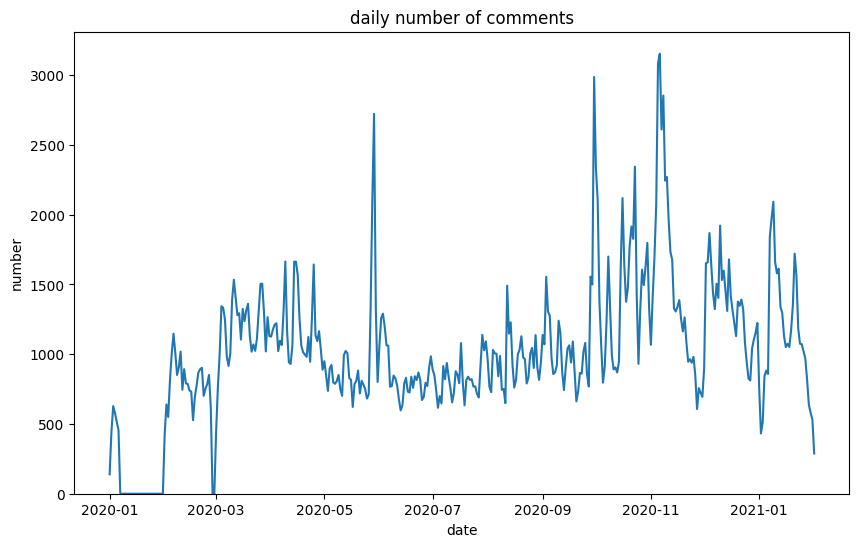

In [ ]:
# Make a chart of the number of posts by day
#df = pd.read_csv("data/debunking_comments[topic=POTUS2020][lang=en].csv")
df = df_debunk_en
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['date'] = df['created_utc'].dt.date  


date_range = pd.date_range(start=df['date'].min(), end=df['date'].max())
daily_counts = df.groupby('date').size()  
daily_counts = daily_counts.reindex(date_range, fill_value=0)

plt.figure(figsize=(10, 6))

sns.lineplot(data=daily_counts)

plt.title('daily number of comments')
plt.ylim((0,None))
plt.xlabel('date')
plt.ylabel('number')
plt.show()